In [6]:
"""
5. Log Phase: Write a log method to log the given message along with the date-time information. Invoke
this method before and after each of the above phases. 
"""
import datetime
def log_message(message):
    timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print(f'{timestamp} - {message}')

In [2]:
"""
1. Write an extract method that extracts the data from all the csv, json, and xml files. Append all the data
to a dataframe.
"""""

import os
import pandas
import json
import chardet
import xml.etree.ElementTree 
log_message('Start of Extraction Phase')
def deencoding(file_path):
    with open(file_path, 'rb') as path:
        results = chardet.detect(path.read())
    return results['encoding']

def parsexml(file):
    xmltree = xml.etree.ElementTree.parse(file)
    root = xmltree.getroot()

    data = []
    for car_element in root.findall('car'):
        car_data = {
            'car_model': car_element.find('model').text,
            'car_price': float(car_element.find('price').text),
            'Fuel': car_element.find('fuel').text,
            'manufacturing_year': int(car_element.find('manufacturing_year').text)
        }
        data.append(car_data)

    return pandas.DataFrame(data)

def extract_data():
    dir_path = 'C://Users//admin//Desktop//UsedCarsData'
    all_files = os.listdir(dir_path)
    # For CSV
    csv_files = [file for file in all_files if file.startswith('used_car_prices') and file.endswith('.csv')]
    dataframe_csv = pandas.concat((pandas.read_csv(os.path.join(dir_path, file), encoding=deencoding(os.path.join(dir_path, file))) for file in csv_files), ignore_index=True)
    # For json
    json_files = [file for file in all_files if file.startswith('used_car_prices') and file.endswith('.json')]
    dataframe_json = pandas.DataFrame()
    for file in json_files:
        with open(os.path.join(dir_path, file), 'r') as f:
            for line in f:
                data = json.loads(line)
                dataframe_json = pandas.concat([dataframe_json, pandas.json_normalize(data)], ignore_index=True)

            dataframe_json = pandas.concat([dataframe_json, pandas.json_normalize(data)], ignore_index=True)

    # For xml
    xml_files = [file for file in all_files if file.startswith('used_car_prices') and file.endswith('.xml')]
    dataframe_xml = pandas.concat((parsexml(os.path.join(dir_path, file)) for file in xml_files), ignore_index=True)
    
    # Combine dataframes
    dataframe_combined = pandas.concat([dataframe_csv, dataframe_json, dataframe_xml], ignore_index=True)
    
    return dataframe_combined

dataframe_extracted = extract_data()
print(dataframe_extracted.head())
log_message('End of Extraction Phase')

2023-12-10 01:57:20 - Start of Extraction Phase
  car_model  year_of_manufacture         price    fuel
0      ritz                 2014   5000.000000  Petrol
1       sx4                 2013   7089.552239  Diesel
2      ciaz                 2017  10820.895522  Petrol
3   wagon r                 2011   4253.731343  Petrol
4     swift                 2014   6865.671642  Diesel
2023-12-10 01:57:20 - End of Extraction Phase


In [3]:
"""
2. a. Change the car_model values to uppercase.
b. Round the car prices to two decimal digits (for example 10373.14).
c. Convert the Fuel column values to categorical values. That is, represent ‘Diesel’ with 1, ‘Petrol’
with 2, and ‘CNG’ with 3.
d. Finally, add a new column called car_age. The values in this column should be difference between
the current year (2022) and the manufacturing year of the car. For instance, if the
manufacturing_year is 2012, then the corresponding value in car_age should be 10 (2022 – 2012).
"""
log_message('Start of Transformation Phase')
def transform_data(dataframe):
    # a. Change car_model values to uppercase
    dataframe['car_model'] = dataframe['car_model'].str.upper()

    # b. Round car prices to two decimal digits
    dataframe['price'] = dataframe['price'].round(2)

    # c. Convert Fuel column values to categorical values
    categorical_values = {'Diesel': 1, 'Petrol': 2, 'CNG': 3}
    dataframe['fuel'] = dataframe['fuel'].map(categorical_values)

    # d. Add a new column, car_age
    current_year = 2022
    dataframe['car_age'] = current_year - dataframe['year_of_manufacture']
    print(dataframe)
    return dataframe
transform_frame=transform_data(dataframe_extracted)
log_message('End of Transformation Phase')


2023-12-10 01:57:21 - Start of Transformation Phase
        car_model  year_of_manufacture     price  fuel  car_age
0            RITZ                 2014   5000.00     2        8
1             SX4                 2013   7089.55     1        9
2            CIAZ                 2017  10820.90     2        5
3         WAGON R                 2011   4253.73     2       11
4           SWIFT                 2014   6865.67     1        8
..            ...                  ...       ...   ...      ...
58    ETIOS CROSS                 2015   6716.42     2        7
59  COROLLA ALTIS                 2010   7089.55     2       12
60        ETIOS G                 2014   6119.40     2        8
61       FORTUNER                 2014  29835.82     1        8
62       FORTUNER                 2014  29835.82     1        8

[63 rows x 5 columns]
2023-12-10 01:57:21 - End of Transformation Phase


In [4]:
#3. Load Phase: Load the data into a sqlite database table.
log_message('Start of Load Phase') 
import sqlite3
def sqlite3_database(df):
    con = sqlite3.connect('UsageCarData.db')
    df.to_sql('car_data', con, index=False, if_exists='replace')
    con.close()
sqlite3_database(transform_frame)
def load_database(df, table_name, database_path='UsageCarData.db'):
    conn = sqlite3.connect(database_path)
    df.to_sql(table_name, conn, index=False, if_exists='replace')
    conn.close()
def read_database(table_name, database_path='UsageCarData.db'):
    conn = sqlite3.connect(database_path)
    df = pandas.read_sql_query(f'SELECT * FROM {table_name}', conn)
    conn.close()
    return df
table_name = 'used_cars_data'
database_path = 'UsageCarData.db' 
load_database(dataframe_extracted, table_name, database_path)
from_database = read_database(table_name, database_path)
print(from_database.head())
log_message('End load Phase')


2023-12-10 01:57:21 - Start of Load Phase
  car_model  year_of_manufacture     price  fuel  car_age
0      RITZ                 2014   5000.00     2        8
1       SX4                 2013   7089.55     1        9
2      CIAZ                 2017  10820.90     2        5
3   WAGON R                 2011   4253.73     2       11
4     SWIFT                 2014   6865.67     1        8
2023-12-10 01:57:22 - End load Phase


2023-12-10 01:58:35 - Start of Analysis and Plot Phase


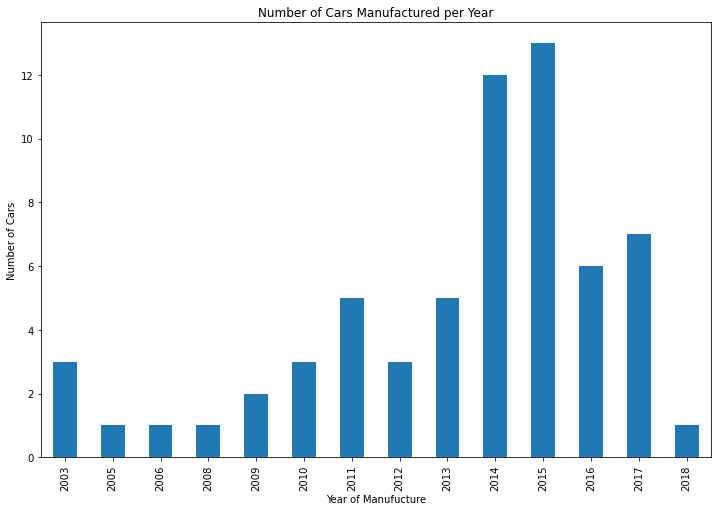

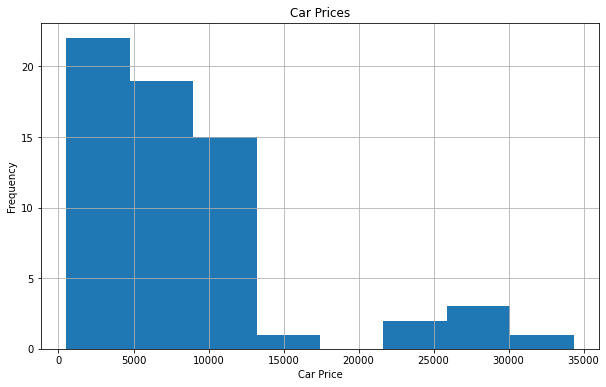

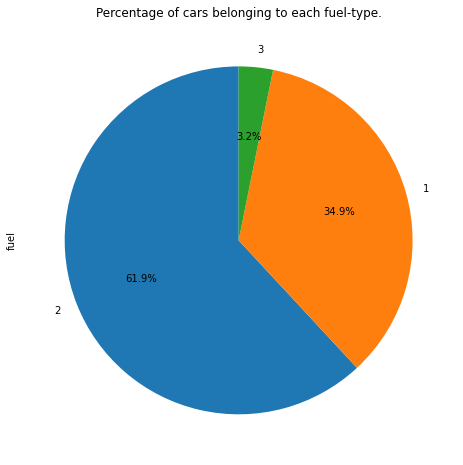

2023-12-10 01:58:37 - End of Analysis and plot Phase


In [7]:
"""
4. Analysis and Plot Phase: 15 points
a. Plot a graph where x-axis represents manufacturing-years and y-axis represents number of cars
manufactured in those each years.
b. Draw an histogram that represents car-prices, and create appropriate buckets/bins (at-least five).
c. Using Pie chart plot the percentage of cars belonging to each fuel-type. For instance, there might
be 20% diesel, 30% petrol, etc. 
"""
log_message('Start of Analysis and Plot Phase')
import matplotlib.pyplot 
# a. 
matplotlib.pyplot.figure(figsize=(12, 8))
transform_frame['year_of_manufacture'].value_counts().sort_index().plot(kind='bar')
matplotlib.pyplot.xlabel('Year of Manufucture')
matplotlib.pyplot.ylabel('Number of Cars')
matplotlib.pyplot.title('Number of Cars Manufactured per Year')
matplotlib.pyplot.show()
# b. 
matplotlib.pyplot.figure(figsize=(10, 6))
transform_frame['price'].hist(bins=8)
matplotlib.pyplot.xlabel('Car Price')
matplotlib.pyplot.ylabel('Frequency')
matplotlib.pyplot.title('Car Prices')
matplotlib.pyplot.show()
# c.
matplotlib.pyplot.figure(figsize=(8, 8))
transform_frame['fuel'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
matplotlib.pyplot.title('Percentage of cars belonging to each fuel-type.')
matplotlib.pyplot.show()

log_message('End of Analysis and plot Phase')
